In [110]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob 
file_list = glob.glob("cluster_mode_res/*")
file_list

['cluster_mode_res/sci-fi_thriller.csv',
 'cluster_mode_res/action_comedy.csv',
 'cluster_mode_res/comedy_drama.csv',
 'cluster_mode_res/sci-fi_comedy.csv']

In [117]:
df = pd.read_csv(file_list[0],index_col=0)
df['total_cluster'] = df['cluster_number'].apply(lambda x : x.split(',')[-1] if pd.notnull(x) else x)
df

,is_baseline,cluster_mode,seed,cluster_number,test_Y_MRR,test_Y_NDCG_5,test_Y_NDCG_10,test_Y_HR_5,test_Y_HR_10,test_Y_MRR_male,test_Y_NDCG_5_male,test_Y_NDCG_10_male,test_Y_HR_5_male,test_Y_HR_10_male,test_Y_MRR_female,test_Y_NDCG_5_female,test_Y_NDCG_10_female,test_Y_HR_5_female,test_Y_HR_10_female,total_cluster
0,False,separate,3,"50,50,100",0.033979,0.023144,0.029255,0.048837,0.076744,0.033265,0.022176,0.028839,0.048012,0.078565,0.036819,0.026997,0.030910,0.052124,0.069498,100
0,False,separate,3,"100,100,200",0.034367,0.022173,0.031491,0.046512,0.090698,0.035698,0.022661,0.032999,0.045102,0.094568,0.029067,0.020231,0.025487,0.052124,0.075290,200
0,False,separate,3,"150,150,300",0.037833,0.027034,0.036361,0.059302,0.103488,0.039202,0.027499,0.038501,0.059651,0.112027,0.032385,0.025181,0.027843,0.057915,0.069498,300
0,False,separate,3,"200,200,400",0.040189,0.029611,0.034137,0.056977,0.077907,0.043406,0.032608,0.037257,0.061106,0.082929,0.027383,0.017681,0.021719,0.040541,0.057915,400
0,False,separate,3,"250,250,500",0.041573,0.031061,0.038521,0.062791,0.097674,0.042216,0.031833,0.038994,0.065470,0.098933,0.039013,0.027985,0.036636,0.052124,0.092664,500
0,False,separate,3,"300,300,600",0.037866,0.028556,0.034637,0.061628,0.089535,0.035735,0.025663,0.032314,0.056741,0.087294,0.046349,0.040074,0.043885,0.081081,0.098456,600
0,False,separate,3,"350,350,700",0.042357,0.032528,0.042336,0.068605,0.113953,0.044263,0.034137,0.043545,0.071290,0.114937,0.034768,0.026124,0.037524,0.057915,0.110039,700
0,False,separate,3,"400,400,800",0.030535,0.017299,0.029809,0.038372,0.096512,0.031890,0.018495,0.031047,0.040737,0.098933,0.025143,0.012541,0.024878,0.028958,0.086873,800
0,False,separate,3,"450,450,800",0.035942,0.026339,0.033307,0.056977,0.090698,0.035842,0.025950,0.033459,0.056741,0.093113,0.036343,0.027887,0.032703,0.057915,0.081081,800
0,False,separate,3,"500,500,1000",0.036962,0.026514,0.033334,0.053488,0.086047,0.035884,0.024988,0.030503,0.049467,0.075655,0.041255,0.032590,0.044606,0.069498,0.127413,1000


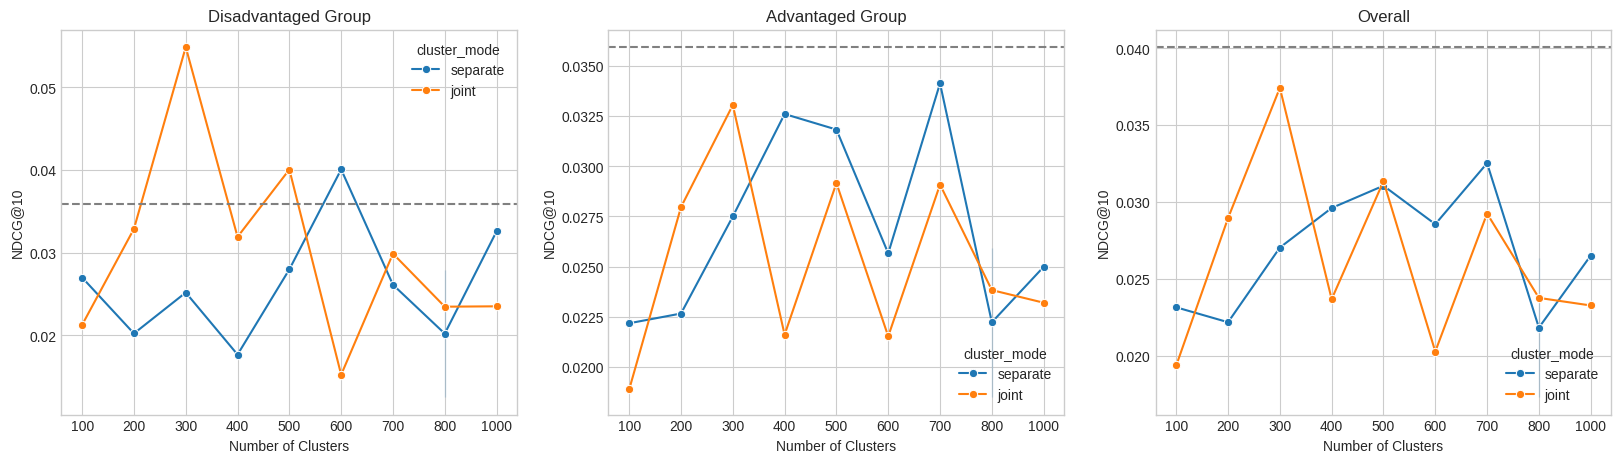

In [136]:
fig, axes = plt.subplots(1,3,figsize=(20,5))
seed = 3
metric = 'test_Y_NDCG_5'
sns.lineplot(data=df[(df['seed']==seed) & (~df['is_baseline'])], x="total_cluster", y=f"{metric}_female", hue="cluster_mode",marker='o',ax=axes[0])              
axes[0].set_title('Disadvantaged Group')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('NDCG@10')
axes[0].axhline(df[(df['seed']==seed) & (df['is_baseline'])][f"{metric}_female"].values[0], color='gray', linestyle='--')
sns.lineplot(data=df[(df['seed']==seed) & (~df['is_baseline'])], x="total_cluster", y=f"{metric}_male", hue="cluster_mode",marker='o',ax=axes[1])   
           
axes[1].set_title('Advantaged Group')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('NDCG@10')
axes[1].axhline(df[(df['seed']==seed) & (df['is_baseline'])][f"{metric}_female"].values[0], color='gray', linestyle='--')

sns.lineplot(data=df[(df['seed']==seed) & (~df['is_baseline'])], x="total_cluster", y=f"{metric}", hue="cluster_mode",marker='o',ax=axes[2])              
axes[2].set_title('Overall')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('NDCG@10')
axes[2].axhline(df[(df['seed']==seed) & (df['is_baseline'])][f"{metric}"].values[0], color='gray', linestyle='--')

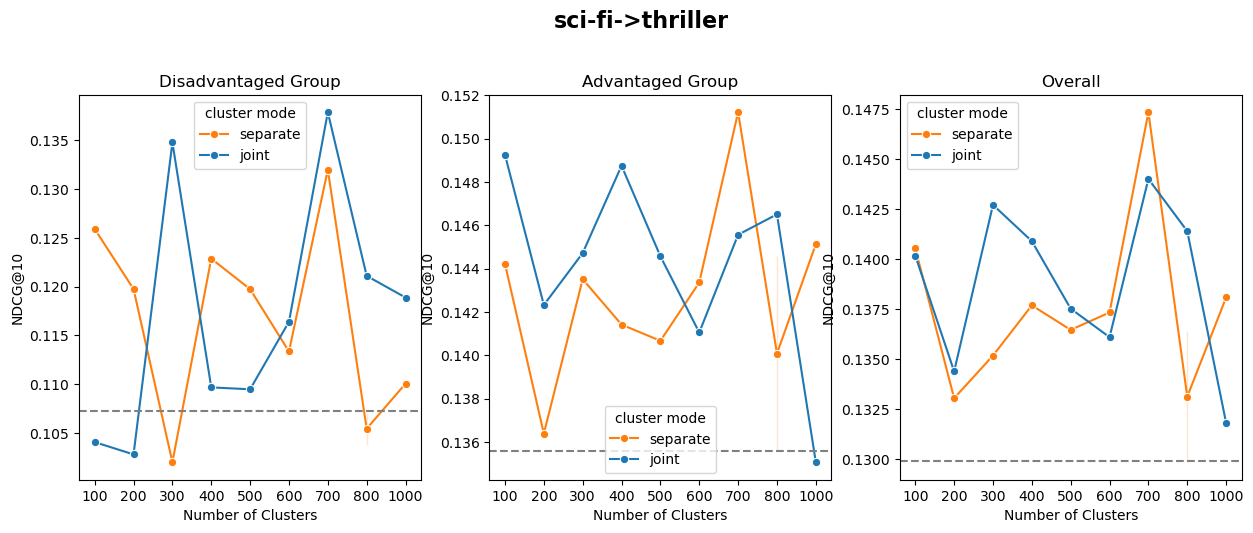

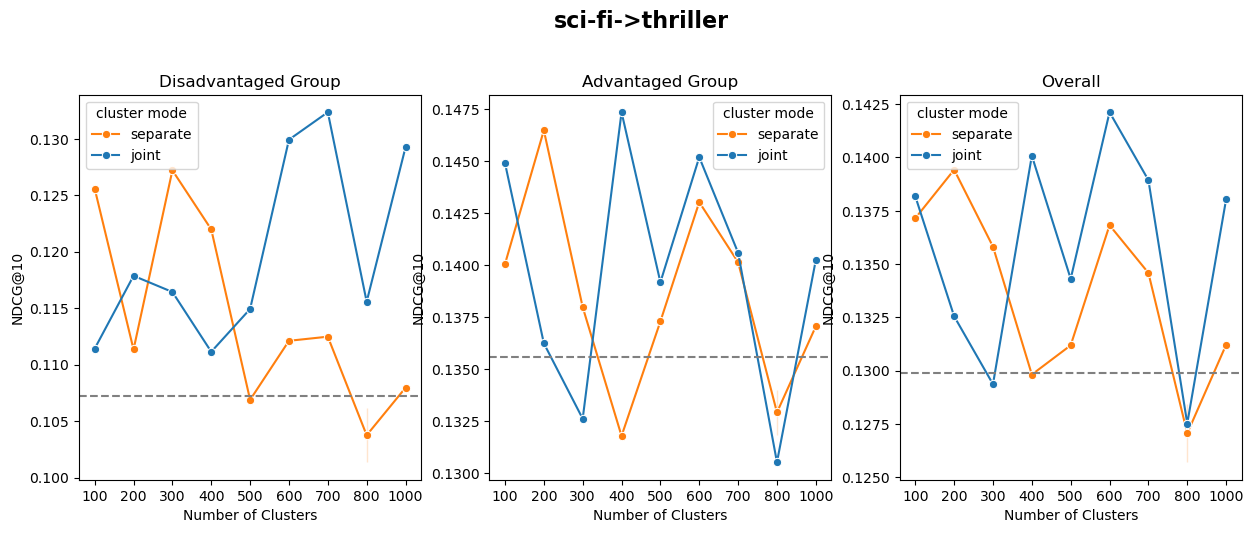

In [52]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
file_list = glob.glob("cluster_mode_res/*")
def plot_seed_result(file_name,seed, metric):
    color = sns.color_palette("tab10")
    palette = {"separate": color[1], "joint": color[0]}
    df = pd.read_csv(file_name,index_col=0)
    df['total_cluster'] = df['cluster_number'].apply(lambda x : x.split(',')[-1] if pd.notnull(x) else x)
    df.rename(columns={"cluster_mode":"cluster mode"},inplace=True)
    # plot the average value of NDCG@10 for each cluster mode under different number of clusters
    fig, axes = plt.subplots(1,3,figsize=(15,5))
    metric_name = '@'.join(metric.split('_')[-2:])
    sns.lineplot(data=df[(df['seed']==seed) & (~df['is_baseline'])], x="total_cluster", y=f"{metric}_female", hue="cluster mode",marker='o',ax=axes[0],palette=palette)           
    axes[0].set_title('Disadvantaged Group')
    axes[0].set_xlabel('Number of Clusters')
    axes[0].set_ylabel(metric_name)
    axes[0].axhline(df[(df['seed']==seed) & (df['is_baseline'])][f"{metric}_female"].values[0], color='gray', linestyle='--')
    sns.lineplot(data=df[(df['seed']==seed) & (~df['is_baseline'])], x="total_cluster", y=f"{metric}_male", hue="cluster mode",marker='o',ax=axes[1],palette=palette)              
    axes[1].set_title('Advantaged Group')
    axes[1].set_xlabel('Number of Clusters')
    axes[1].set_ylabel(metric_name)
    axes[1].axhline(df[(df['seed']==seed) & (df['is_baseline'])][f"{metric}_male"].values[0], color='gray', linestyle='--')
    sns.lineplot(data=df[(df['seed']==seed) & (~df['is_baseline'])], x="total_cluster", y=f"{metric}", hue="cluster mode",marker='o',ax=axes[2],palette=palette)              
    axes[2].set_title('Overall')
    axes[2].set_xlabel('Number of Clusters')
    axes[2].set_ylabel(metric_name)
    axes[2].axhline(df[(df['seed']==seed) & (df['is_baseline'])][f"{metric}"].values[0], color='gray', linestyle='--')

    file = "->".join(file_name.split('/')[-1][:-4].split("_"))
    fig.suptitle(f'{file}', fontsize=16, fontweight='bold', x=0.5, y=1.05)
seed = 6
file_list = glob.glob("cluster_mode_res/*")
for i, file in enumerate(file_list):
    if i==0:
        plot_seed_result(file,seed, 'test_Y_NDCG_10')
        plt.show()
file_list = glob.glob("cluster_mode_res_new/*")
for i, file in enumerate(file_list):
    if i==0:
        plot_seed_result(file,seed, 'test_Y_NDCG_10')
        plt.show()

/tmp/ipykernel_1533887/3836102305.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_df = filtered_df.groupby(['cluster mode', 'total_cluster']).mean().reset_index()
/tmp/ipykernel_1533887/3836102305.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  baseline_df = filtered_df[filtered_df['is_baseline']].groupby("is_baseline").mean().reset_index()


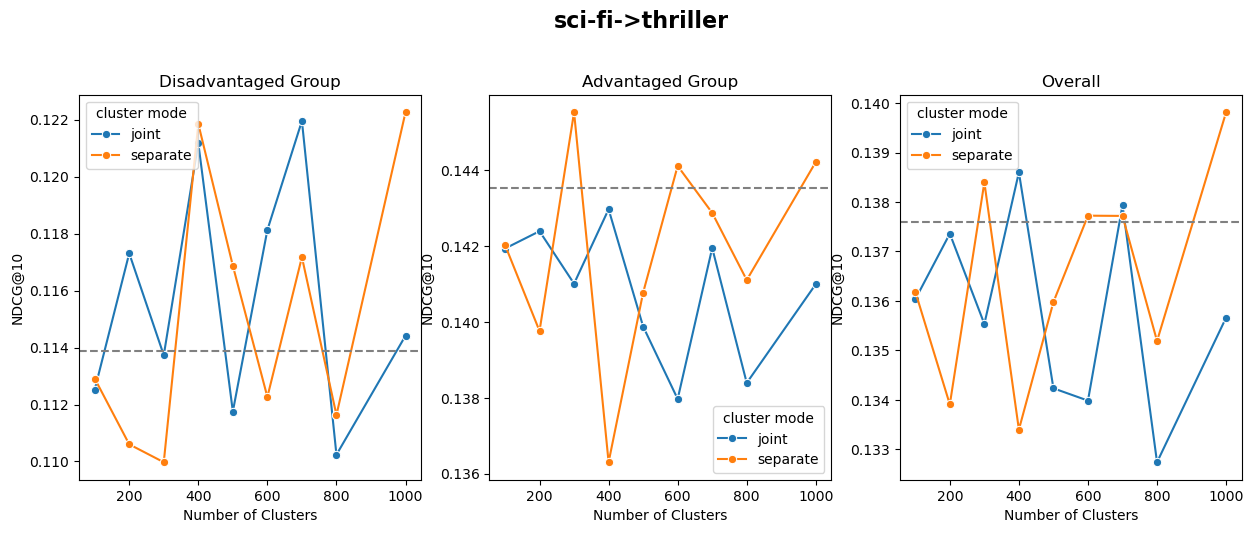

/tmp/ipykernel_1533887/3836102305.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_df = filtered_df.groupby(['cluster mode', 'total_cluster']).mean().reset_index()
/tmp/ipykernel_1533887/3836102305.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  baseline_df = filtered_df[filtered_df['is_baseline']].groupby("is_baseline").mean().reset_index()


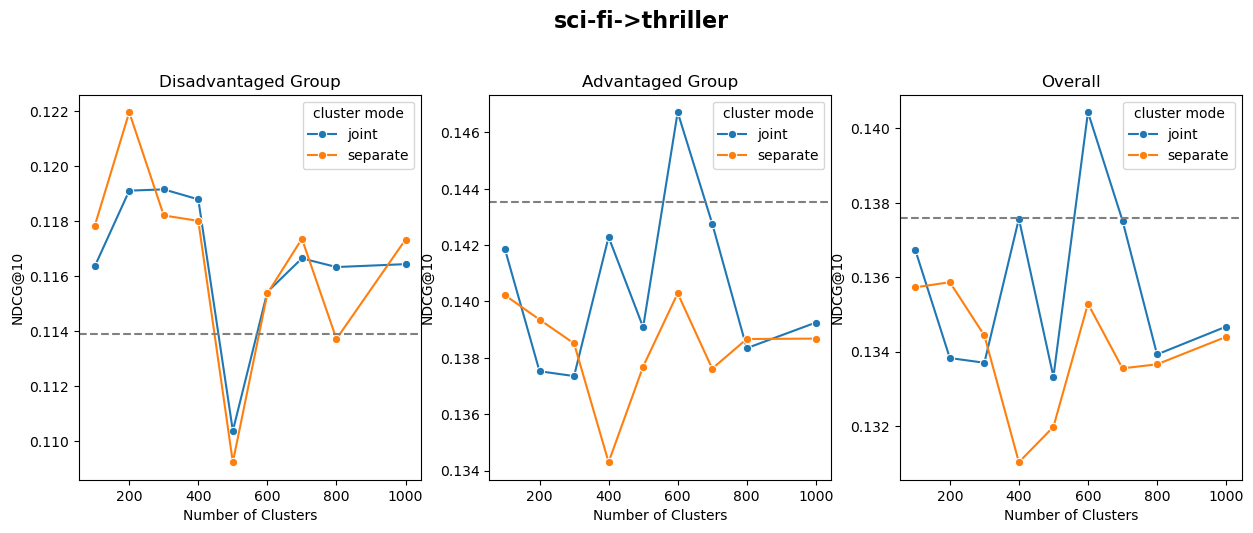

In [53]:
# read in the data
def plot_average_result(file_name, metric):
    color = sns.color_palette("tab10")
    palette = {"separate": color[1], "joint": color[0]}
    df = pd.read_csv(file_name,index_col=0)
    df['total_cluster'] = df['cluster_number'].apply(lambda x : x.split(',')[-1] if pd.notnull(x) else x)
    df.rename(columns={"cluster_mode":"cluster mode"},inplace=True)
    # Group by 'cluster_mode' and 'total_cluster' and calculate the mean
    filtered_df = df[df['seed'].isin(list(range(3,8)))]
    average_df = filtered_df.groupby(['cluster mode', 'total_cluster']).mean().reset_index()
    average_df["total_cluster"] = average_df["total_cluster"].astype('int')
    average_df['is_baseline'] = average_df['is_baseline'].astype('bool')
    average_df = average_df.sort_values(by='total_cluster')
    # calculate mean baseline value
    baseline_df = filtered_df[filtered_df['is_baseline']].groupby("is_baseline").mean().reset_index()
    baseline_df['is_baseline'] = baseline_df['is_baseline'].astype('bool')
    average_df = pd.concat([average_df, baseline_df], axis=0)
    fig, axes = plt.subplots(1,3,figsize=(15,5))
    metric_name = '@'.join(metric.split('_')[-2:])
    sns.lineplot(data=average_df[(average_df['seed']==5) & (~average_df['is_baseline'])], x="total_cluster", y=f"{metric}_female", hue="cluster mode",marker='o',ax=axes[0],palette=palette)           
    axes[0].set_title('Disadvantaged Group')
    axes[0].set_xlabel('Number of Clusters')
    axes[0].set_ylabel(metric_name)
    axes[0].axhline(average_df[(average_df['seed']==5) & (average_df['is_baseline'])][f"{metric}_female"].values[0], color='gray', linestyle='--')
    sns.lineplot(data=average_df[(average_df['seed']==5) & (~average_df['is_baseline'])], x="total_cluster", y=f"{metric}_male", hue="cluster mode",marker='o',ax=axes[1],palette=palette)              
    axes[1].set_title('Advantaged Group')
    axes[1].set_xlabel('Number of Clusters')
    axes[1].set_ylabel(metric_name)
    axes[1].axhline(average_df[(average_df['seed']==5) & (average_df['is_baseline'])][f"{metric}_male"].values[0], color='gray', linestyle='--')
    sns.lineplot(data=average_df[(average_df['seed']==5) & (~average_df['is_baseline'])], x="total_cluster", y=f"{metric}", hue="cluster mode",marker='o',ax=axes[2],palette=palette)              
    axes[2].set_title('Overall')
    axes[2].set_xlabel('Number of Clusters')
    axes[2].set_ylabel(metric_name)
    axes[2].axhline(average_df[(average_df['seed']==5) & (average_df['is_baseline'])][f"{metric}"].values[0], color='gray', linestyle='--')

    file = "->".join(file_name.split('/')[-1][:-4].split("_"))
    fig.suptitle(f'{file}', fontsize=16, fontweight='bold', x=0.5, y=1.05)

file_list = glob.glob("cluster_mode_res/*")
for i, file in enumerate(file_list):
    if i==0:
        plot_average_result(file, 'test_Y_NDCG_10')
        plt.show()
file_list = glob.glob("cluster_mode_res_new/*")
for i, file in enumerate(file_list):
    if i==0:
        plot_average_result(file, 'test_Y_NDCG_10')
        plt.show()
# def plot_average_result(file_name, metric):
#     color = sns.color_palette("tab10")
#     palette = {"separate": color[1], "joint": color[0]}
#     plt.style.use('seaborn-whitegrid')
#     df = pd.read_csv(file_name,index_col=0)
#     df['total_cluster'] = df['cluster_number'].apply(lambda x : x.split(',')[-1])
#     df.rename(columns={"cluster_mode":"cluster mode"},inplace=True)
#     # Group by 'cluster_mode' and 'total_cluster' and calculate the mean
#     filtered_df = df[df['seed'].isin([0, 1, 2])]
#     average_df = filtered_df.groupby(['cluster mode', 'total_cluster']).mean().reset_index()
#     average_df["total_cluster"] = average_df["total_cluster"].astype('int')
#     average_df = average_df.sort_values(by='total_cluster')
#     # plot the average value of NDCG@10 for each cluster mode under different number of clusters
#     fig, axes = plt.subplots(1,3,figsize=(20,5))
#     metric_name = '@'.join(metric.split('_')[-2:])
#     sns.lineplot(data=average_df[average_df['seed']==1], x="total_cluster", y=f"{metric}_female", hue="cluster mode",marker='o',ax=axes[0],palette=palette)                
#     axes[0].set_title('Disadvantaged Group')
#     axes[0].set_xlabel('Number of Clusters')
#     axes[0].set_ylabel(metric_name)
#     sns.lineplot(data=average_df[average_df['seed']==1], x="total_cluster", y=f"{metric}_male", hue="cluster mode",marker='o',ax=axes[1],palette=palette)               
#     axes[1].set_title('Advantaged Group')
#     axes[1].set_xlabel('Number of Clusters')
#     axes[1].set_ylabel(metric_name)
#     sns.lineplot(data=average_df[average_df['seed']==1], x="total_cluster", y=f"{metric}", hue="cluster mode",marker='o',ax=axes[2],palette=palette)                
#     axes[2].set_title('Overall')
#     axes[2].set_xlabel('Number of Clusters')
#     axes[2].set_ylabel(metric_name)
#     file = "->".join(file_name.split('/')[-1][:-4].split("_"))
#     fig.suptitle(f'{file}', fontsize=16, fontweight='bold', x=0.5, y=1.05)
